In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the function to optimize
def func(x):
    return x[0]**2 + 4*x[0]*x[1] + 4*x[1]**2

# Define the gradient of the function
def grad(x):
    g = np.zeros((2, 1))
    g[0][0] = 2 * x[0] + 4 * x[1]
    g[1][0] = 8 * x[1] + 4 * x[0]
    return g

# Define the scaling matrix D
def D(x):
    h = np.zeros((2, 2))
    h[0][0] = 1 / 2
    h[0][1] = 0
    h[1][0] = 0
    h[1][1] = 1 / 8
    return h

# Define the norm calculation for the gradient
def norm(gradient):
    return np.linalg.norm(gradient)

# Gradient descent with scaling
def gradient_descent_with_scaling(x0, toler, p0, max_iters=100000):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]  # Store trajectory points for plotting

    g = grad(x)
    D_mat = D(x)
    L2 = norm(g)
    count = 0
    min_step_size = 1e-20  # To avoid infinite loop with small step sizes

    while L2 > toler and count < max_iters:
        # Compute scaled descent direction
        d = -D_mat @ g

        # Line search parameters
        a0 = 1
        gamma = 0.5

        # Line search
        while a0 > min_step_size and func(x + a0 * d) > func(x) + gamma * a0 * g.T @ d:
            a0 *= p0

        if a0 < min_step_size:
            print("Step size too small, stopping early.")
            break

        # Update all variables simultaneously
        x = x + a0 * d

        # Store trajectory
        trajectory.append(x.copy())

        # Update gradient, norm, and iteration count
        g = grad(x)
        L2 = norm(g)
        count += 1

    return count, x, func(x), np.array(trajectory)  # Return trajectory


/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_13199/2504227080.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[0][0] = 2 * x[0] + 4 * x[1]
/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_13199/2504227080.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[1][0] = 8 * x[1] + 4 * x[0]


Iterations: 100000
Optimal Point: [-39.49999813  19.75000094]
Minimum Value: [1.38697942e-11]


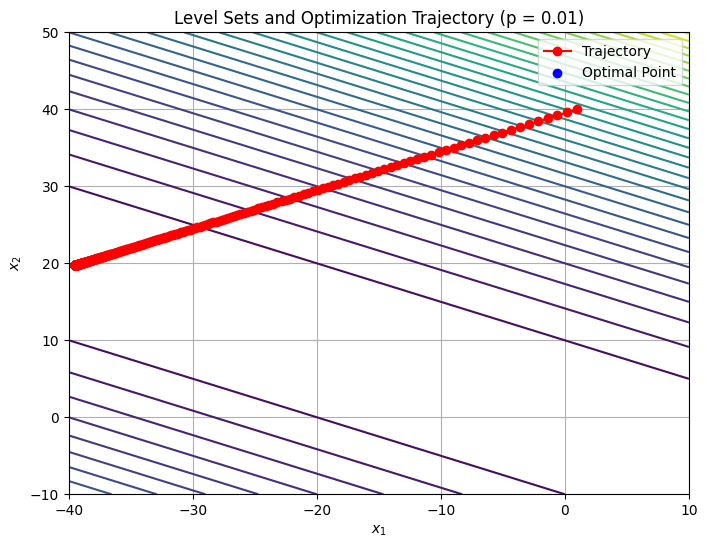

In [9]:
# Parameters
tolerance = 1e-12
p_value = 0.01
x0 = [[1], [40]]

# Run gradient descent with scaling
iterations, optimal_point, optimal_value, trajectory = gradient_descent_with_scaling(
    x0, tolerance, p_value
)

# Print results
print(f"Iterations: {iterations}")
print(f"Optimal Point: {optimal_point.flatten()}")
print(f"Minimum Value: {optimal_value}")

# Plotting level sets and trajectory
x1_range = np.linspace(-40, 10, 100)
x2_range = np.linspace(-10, 50, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = X1**2 + 4 * X1 * X2 + 4 * X2**2

# Extract trajectory points
trajectory_points = np.squeeze(trajectory)
x1_traj, x2_traj = trajectory_points[:, 0], trajectory_points[:, 1]

# Plot
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap="viridis")  # Level sets
plt.plot(x1_traj, x2_traj, 'r-o', label="Trajectory")  # Trajectory
plt.scatter(optimal_point[0], optimal_point[1], color='blue', label="Optimal Point")  # Optimal point
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Level Sets and Optimization Trajectory (p = 0.01)")
plt.legend()
plt.grid()
plt.show()